In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler

In [2]:
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.dtypes

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

In [9]:
df1=df.dropna()

In [10]:
x=df1[['potential', 'strength', 'vision', 'shot_power','stamina']]
y=df1['overall_rating']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3abd6438>,
      dtype=object)

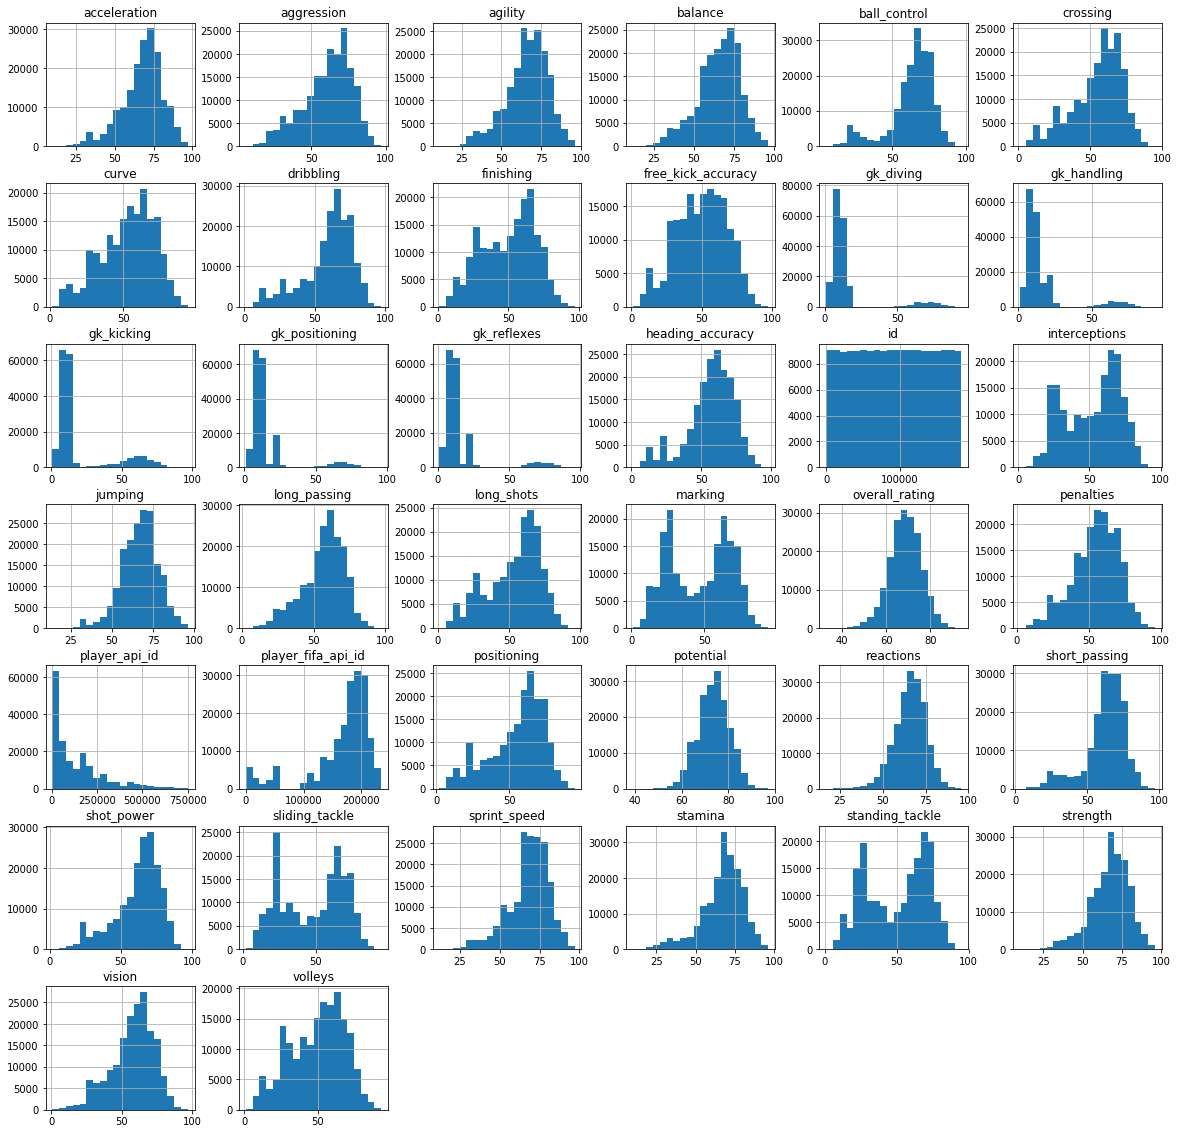

In [16]:
df1.hist(bins=20,figsize=(20,20)) # Visualising data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=10)

In [22]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [20]:
# Normalazing the variables using StandardScaler
sc_X = StandardScaler()
X_train_trans = sc_X.fit_transform(X_train)
X_test_trans = sc_X.fit_transform(X_test)

y_train = np.log(y_train)
y_test = np.log(y_test)

In [23]:
randomForest = RandomForestRegressor(n_estimators=500, oob_score=True, n_jobs=-1,random_state=10)
randomForest.fit(X_train_trans, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=True, random_state=10, verbose=0, warm_start=False)

In [24]:
predictions = randomForest.predict(X_test_trans)
r_sq_score = r2_score(y_test, predictions)
r_sq_score

0.9045734575762778

In [25]:
predictions

array([4.3117871 , 4.3151616 , 4.12257284, ..., 4.23227026, 4.3815002 ,
       4.18965474])

In [27]:
# This is also a good model with good accuracy of r2 score .90 
import matplotlib.pyplot as plt

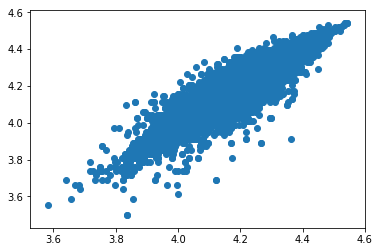

In [29]:
plt.scatter(predictions,y_test)